In [5]:
import sklearn
import numpy as np
import pylab
import pickle
import pandas as pd
import glob
import os



We compute confusion matrix using the final object (not just the sklearn svm). But we do it without sound segmentation.


In [3]:
files = glob.glob('/mnt/protolab_innov/data/sounds/dataset_demo/*/*.wav')
_class = [os.path.basename(f).split('-')[0] for f in files]


df = pd.DataFrame(zip(_class, files), columns=['classname', 'filename'])
mask_to_remove = df.filename.str.contains('BlowNose') |   df.filename.str.contains('SmokeDetector')
mask_to_remove |=  df.filename.str.contains('Laugh')
mask_to_remove |=  df.filename.str.contains('RobotNoisePushed')

df = df[~mask_to_remove]

#df = df[~df.filename.str.contains('Romeo')]  # we remove file recorded on romeo from the database.. because there are in 44100Hz not 48000

print(df.classname.value_counts())
df.shape[0]

ToyGiraffe          200
ToyPig              192
VoiceAlex           119
Whistle             111
ClapHand            103
ToyChicken           83
ToyMaracas           65
FakeSneeze           52
TacTac               51
DeskBell             50
DoorBell01           36
HumanCaressHead      33
FireAlarmFr          32
VoiceLaurent         32
DoorBell02           22
HumanScratchHead     21
ApplauseLight        16
NoisePaper           13
dtype: int64


1231

In [82]:
%load_ext autoreload
%autoreload
from sklearn.cross_validation import StratifiedKFold
n_folds = 3
stratified_fold = StratifiedKFold(df.classname, n_folds)  # we use only 3 fold.. as we have only 16 values on some data

folds = list(stratified_fold)
expected, predicted, labels, filenames = get_expected_predicted_stratified_fold(stratified_fold, df, calibrate_score=True)
predicted_class = [x.class_predicted for x in predicted]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CLF is SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
warning file /mnt/protolab_innov/data/sounds/dataset_demo/DeskBell/DeskBell-024-Romeo.wav, wrong fs 44100, using it.. please remove the file if you don't want
warning file /mnt/protolab_innov/data/sounds/dataset_demo/DeskBell/DeskBell-023-Romeo.wav, wrong fs 44100, using it.. please remove the file if you don't want
warning file /mnt/protolab_innov/data/sounds/dataset_demo/DeskBell/DeskBell-025-Romeo.wav, wrong fs 44100, using it.. please remove the file if you don't want
CLF is SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
warning file /mnt/protolab_innov/data/sounds/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib
[[ 16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  96   0   0   0   0   0   0   0   0   0   0   7   0   0   0   0   0]
 [  0   0  46   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0]
 [  0   0   0  34   0   0   0   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0  22   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  31   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3  14   0   0   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9   0   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50   0   1   0   0   0   0   0]
 [  0   1   0   0   0   

<IPython.core.display.Javascript object>


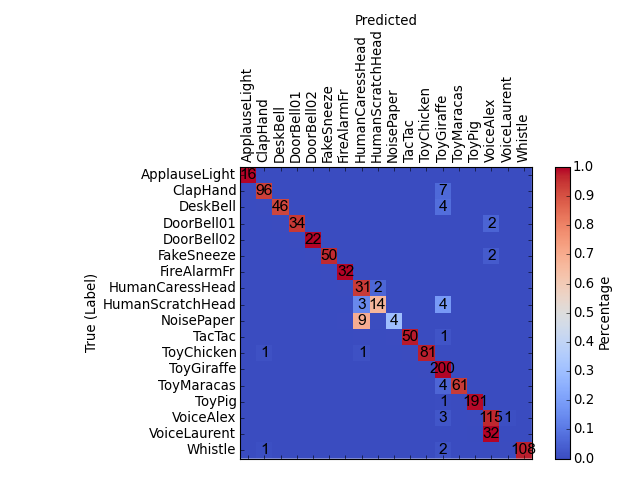

In [83]:
%load_ext autoreload
%autoreload
%pylab notebook
import seaborn as sns
sns.reset_orig()
import sound_classification.evaluate_classification
sound_classification.evaluate_classification.print_report(expected, predicted_class, labels)

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[ 16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  96   0   0   0   0   0   0   0   0   7   0   0   0   0   0   0   0]
 [  0   0  46   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0]
 [  0   0   0  34   0   0   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0  22   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0   0   0   0   0   0   9   0   0   0]
 [  0   0   0   0   0   0   0   0  50   0   1   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0  81   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 200   0   0   0   0   0   0   0]
 [  0   0   0   0   0   

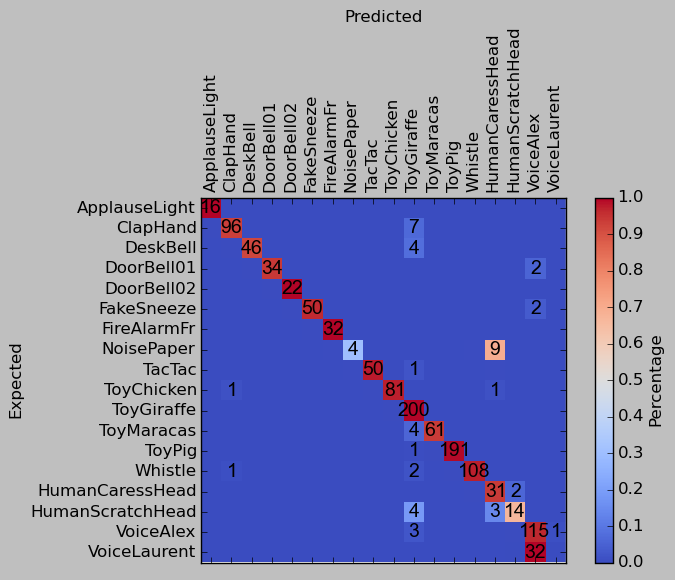

In [137]:
# REORDERING COLUMNS..
%pylab inline
labels_bis = labels.copy()
labels_bis = ['ApplauseLight', 'ClapHand', 'DeskBell', 'DoorBell01', 'DoorBell02',
 'FakeSneeze', 'FireAlarmFr', 'NoisePaper', 'TacTac', 'ToyChicken', 'ToyGiraffe', 'ToyMaracas', 'ToyPig',
 'Whistle', 'HumanCaressHead', 'HumanScratchHead', 'VoiceAlex', 'VoiceLaurent']
labels_bis = np.array(labels_bis, dtype=np.object)
%load_ext autoreload
%autoreload
import seaborn as sns
sns.reset_orig()
import sound_classification.evaluate_classification
pylab.figure()

fig = sound_classification.evaluate_classification.print_report(expected, predicted_class, labels_bis)
fig.savefig('/tmp/final/conf_mat_withou_threshold.png', dpi=600)

In [72]:
type(labels)
labels.shape
np.array(labels_bis, dtype=np.object).dtype
labels.dtype

dtype('O')

## FILTERING THRESHOLD ..

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


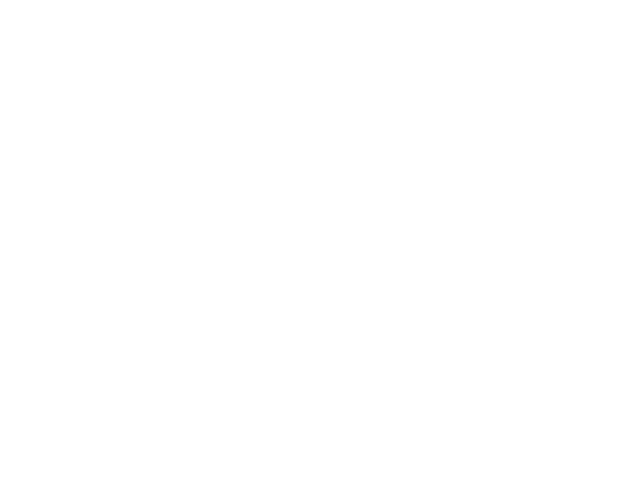

[[ 16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   11]
 [  0   0  46   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    3]
 [  0   0   0  33   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    3]
 [  0   0   0   0  22   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  50   0   0   0   0   0   0   0   0   0   0   0   0
    2]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   4   0   0   0   0   0   0   3   0   0   0
    6]
 [  0   0   0   0   0   0   0   0  44   0   0   0   0   0   0   0   0   0
    7]
 [  0   0   0   0   0   0   0   0   0  81   0   0   0   0   0   0   0   0
    2]
 [  0   0   0   0   0   0   0   0   0   0 192   0   0   0   0   0   0   0
    8]
 [  0   0   0   0   0   0   0   0   0   0   0  61   0   0   0   0   0   0
    4]
 [  0   0   0   0   0   0   

<IPython.core.display.Javascript object>


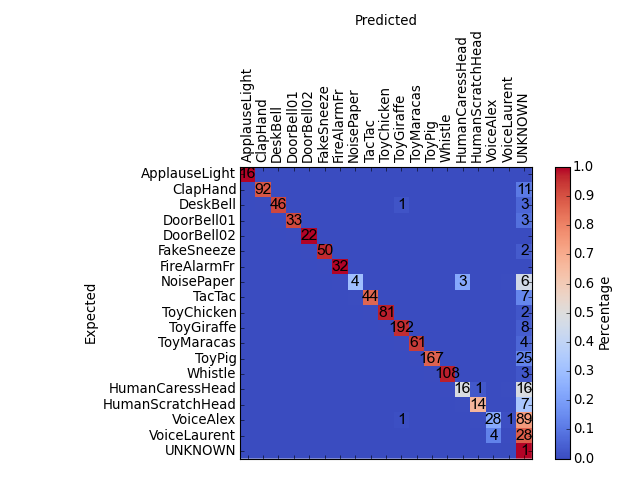

In [136]:
prediction_df = pd.DataFrame([[x.confidence, x.score, x.class_predicted, x.timestamp_start, expected_val, filename] for x, expected_val, filename in zip(predicted, expected, filenames)], columns=['confidence', 'score', 'class_predicted', 'timestamp_start', 'expected', 'filename'])
mask_wrong = prediction_df.score < 0.9
#prediction_df[mask_wrong].class_predicted = 'UNKNOWN'
prediction_df.class_predicted[mask_wrong] = 'UNKNOWN'
%pylab notebook
new_labels = np.concatenate([labels_bis,  ['UNKNOWN']])
pylab.figure()
sound_classification.evaluate_classification.print_report(list(prediction_df.expected) + ['UNKNOWN'], list(prediction_df.class_predicted) + ['UNKNOWN'], new_labels  )
pylab.savefig('/tmp/final/conf_mat_with_threshold.png', dpi=600)

In [105]:
np.sum(prediction_df.class_predicted == 'UNKNOWN')
#np.sum(mask_wrong)

284